In [73]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [74]:
wine_df=pd.read_csv('winemag-data_first150k.csv')
wine_df=wine_df.loc[wine_df.country=='US',['points','price','region_1', \
    'variety','winery']]
wine_df=wine_df.dropna(axis=0,how='any')


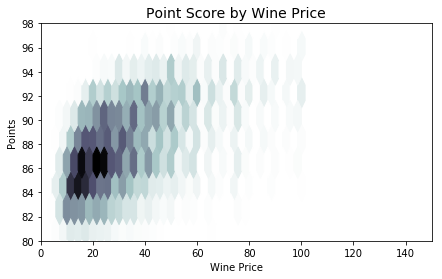

In [75]:
plt.figure(figsize=(7,4))
plt.hexbin(wine_df.price,wine_df.points,cmap='bone_r',gridsize=35,
    extent=(0,100,73,150))
plt.xlim(0,150)
plt.ylim(80,98)
plt.title('Point Score by Wine Price',size=14)
plt.ylabel('Points')
plt.xlabel('Wine Price')
plt.show()

In [76]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold

In [77]:

crossvalidation = KFold(n=X.shape[0], n_folds=5,
 shuffle=True, random_state=1)
wine_train,wine_test=train_test_split(wine_df,test_size=0.15)

In [78]:
regn_lab=LabelEncoder().fit(np.unique(wine_df.region_1.values))
var_lab=LabelEncoder().fit(np.unique(wine_df.variety.values))
wnry_lab=LabelEncoder().fit(np.unique(wine_df.winery.values))
points_lab=LabelEncoder().fit(np.unique(wine_df.points.values))
wine_train['regn_enc']=regn_lab.transform(wine_train.region_1)
wine_train['var_enc']=var_lab.transform(wine_train.variety)
wine_train['wnry_enc']=wnry_lab.transform(wine_train.winery)
wine_train['points']=points_lab.transform(wine_train.points)
wine_train=wine_train.drop(['points','region_1','variety','winery'],axis=1)

/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [79]:
X,y = wine_train, wine_df['price']

In [80]:
for depth in range(1,10):
    tree_classifier = tree.DecisionTreeClassifier(
        max_depth=depth, random_state=0)
    if tree_classifier.fit(X,y).tree_.max_depth < depth:
        break
    score = np.mean(cross_val_score(tree_classifier, X, y,scoring="accuracy", cv=crossvalidation, n_jobs=1))
    print "Depth: %i Accuracy: %.3f" % (depth,score)

ValueError: Number of labels=62003 does not match number of samples=52702

In [23]:
# Violin plot of points on region - use regions with 50 or more wines only
vio_dfm=wine_df.loc[:,['region_1','price']].groupby('region_1').median()
vio_dfm.reset_index(inplace=True)
vio_df=wine_df.loc[:,['region_1','price']].groupby('region_1').count()
vio_df.reset_index(inplace=True)
vio_df=vio_df.merge(vio_dfm,'inner',left_on='region_1',right_on='region_1')
vio_df=vio_df.sort_values('price_y',ascending=False)
vio_df=vio_df.loc[vio_df.price_x>=50,:]
vio_df=vio_df.iloc[0:30,0]
vio_df2=[wine_df.loc[wine_df.region_1==j,['price']] for j in vio_df.values]

In [29]:
bin_map={
    2300:'extreme expensive',
    2013:'extreme expensive',
    1900:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1400:'extreme expensive',
    1300:'extreme expensive',
    1200:'extreme expensive',
    1100:'extreme expensive',
    1100:'extreme expensive',
    1000:'extreme expensive',
    980:'very expensive',
900:'very expensive',
850:'very expensive',
850:'very expensive',
850:'very expensive',
848:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
800:'very expensive',
775:'very expensive',
775:'very expensive',
770:'very expensive',
770:'very expensive',
764:'very expensive',
757:'very expensive',
757:'very expensive',
757:'very expensive',
740:'very expensive',
698:'very expensive',
685:'very expensive',
670:'very expensive',
670:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
660:'very expensive',
639:'very expensive',
639:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
625:'very expensive',
612:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
600:'very expensive',
599:'very expensive',
596:'very expensive',
596:'very expensive',
588:'very expensive',
580:'very expensive',
574:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
550:'very expensive',
545:'very expensive',
544:'very expensive',
535:'very expensive',
535:'very expensive',
535:'very expensive',
530:'very expensive',
525:'very expensive',
520:'very expensive',
510:'very expensive',
505:'very expensive',
505:'very expensive',
505:'very expensive',
100:'expensive',
101:'expensive',
102:'expensive',
103:'expensive',
104:'expensive',
105:'expensive',
106:'expensive',
107:'expensive',
108:'expensive',
109:'expensive',
110:'expensive',
111:'expensive',
112:'expensive',
113:'expensive',
114:'expensive',
115:'expensive',
116:'expensive',
117:'expensive',
118:'expensive',
119:'expensive',
120:'expensive',
121:'expensive',
122:'expensive',
123:'expensive',
124:'expensive',
125:'expensive',
126:'expensive',
127:'expensive',
128:'expensive',
129:'expensive',
130:'expensive',
131:'expensive',
132:'expensive',
133:'expensive',
134:'expensive',
135:'expensive',
136:'expensive',
137:'expensive',
138:'expensive',
139:'expensive',
140:'expensive',
141:'expensive',
142:'expensive',
143:'expensive',
144:'expensive',
145:'expensive',
146:'expensive',
147:'expensive',
148:'expensive',
149:'expensive',
150:'expensive',
151:'expensive',
152:'expensive',
153:'expensive',
154:'expensive',
155:'expensive',
156:'expensive',
157:'expensive',
158:'expensive',
159:'expensive',
160:'expensive',
161:'expensive',
162:'expensive',
163:'expensive',
164:'expensive',
165:'expensive',
166:'expensive',
167:'expensive',
168:'expensive',
169:'expensive',
170:'expensive',
171:'expensive',
172:'expensive',
173:'expensive',
174:'expensive',
175:'expensive',
176:'expensive',
177:'expensive',
178:'expensive',
179:'expensive',
180:'expensive',
181:'expensive',
182:'expensive',
183:'expensive',
184:'expensive',
185:'expensive',
186:'expensive',
187:'expensive',
188:'expensive',
189:'expensive',
190:'expensive',
191:'expensive',
192:'expensive',
193:'expensive',
194:'expensive',
195:'expensive',
196:'expensive',
197:'expensive',
198:'expensive',
199:'expensive',
200:'expensive',
201:'expensive',
202:'expensive',
203:'expensive',
204:'expensive',
205:'expensive',
206:'expensive',
207:'expensive',
208:'expensive',
209:'expensive',
210:'expensive',
211:'expensive',
212:'expensive',
213:'expensive',
214:'expensive',
215:'expensive',
216:'expensive',
217:'expensive',
218:'expensive',
219:'expensive',
220:'expensive',
221:'expensive',
222:'expensive',
223:'expensive',
224:'expensive',
225:'expensive',
226:'expensive',
227:'expensive',
228:'expensive',
229:'expensive',
230:'expensive',
231:'expensive',
232:'expensive',
233:'expensive',
234:'expensive',
235:'expensive',
236:'expensive',
237:'expensive',
238:'expensive',
239:'expensive',
240:'expensive',
241:'expensive',
242:'expensive',
243:'expensive',
244:'expensive',
245:'expensive',
246:'expensive',
247:'expensive',
248:'expensive',
249:'expensive',
250:'expensive',
251:'expensive',
252:'expensive',
253:'expensive',
254:'expensive',
255:'expensive',
256:'expensive',
257:'expensive',
258:'expensive',
259:'expensive',
260:'expensive',
261:'expensive',
262:'expensive',
263:'expensive',
264:'expensive',
265:'expensive',
266:'expensive',
267:'expensive',
268:'expensive',
269:'expensive',
270:'expensive',
271:'expensive',
272:'expensive',
273:'expensive',
274:'expensive',
275:'expensive',
276:'expensive',
277:'expensive',
278:'expensive',
279:'expensive',
280:'expensive',
281:'expensive',
282:'expensive',
283:'expensive',
284:'expensive',
285:'expensive',
286:'expensive',
287:'expensive',
288:'expensive',
289:'expensive',
290:'expensive',
291:'expensive',
292:'expensive',
293:'expensive',
294:'expensive',
295:'expensive',
296:'expensive',
297:'expensive',
298:'expensive',
299:'expensive',
300:'expensive',
301:'expensive',
302:'expensive',
303:'expensive',
304:'expensive',
305:'expensive',
306:'expensive',
307:'expensive',
308:'expensive',
309:'expensive',
310:'expensive',
311:'expensive',
312:'expensive',
313:'expensive',
314:'expensive',
315:'expensive',
316:'expensive',
317:'expensive',
318:'expensive',
319:'expensive',
320:'expensive',
321:'expensive',
322:'expensive',
323:'expensive',
324:'expensive',
325:'expensive',
326:'expensive',
327:'expensive',
328:'expensive',
329:'expensive',
330:'expensive',
331:'expensive',
332:'expensive',
333:'expensive',
334:'expensive',
335:'expensive',
336:'expensive',
337:'expensive',
338:'expensive',
339:'expensive',
340:'expensive',
341:'expensive',
342:'expensive',
343:'expensive',
344:'expensive',
345:'expensive',
346:'expensive',
347:'expensive',
348:'expensive',
349:'expensive',
350:'expensive',
351:'expensive',
352:'expensive',
353:'expensive',
354:'expensive',
355:'expensive',
356:'expensive',
357:'expensive',
358:'expensive',
359:'expensive',
360:'expensive',
361:'expensive',
362:'expensive',
363:'expensive',
364:'expensive',
365:'expensive',
366:'expensive',
367:'expensive',
368:'expensive',
369:'expensive',
370:'expensive',
371:'expensive',
372:'expensive',
373:'expensive',
374:'expensive',
375:'expensive',
376:'expensive',
377:'expensive',
378:'expensive',
379:'expensive',
380:'expensive',
381:'expensive',
382:'expensive',
383:'expensive',
384:'expensive',
385:'expensive',
386:'expensive',
387:'expensive',
388:'expensive',
389:'expensive',
390:'expensive',
391:'expensive',
392:'expensive',
393:'expensive',
394:'expensive',
395:'expensive',
396:'expensive',
397:'expensive',
398:'expensive',
399:'expensive',
400:'expensive',
401:'expensive',
402:'expensive',
403:'expensive',
404:'expensive',
405:'expensive',
406:'expensive',
407:'expensive',
408:'expensive',
409:'expensive',
410:'expensive',
411:'expensive',
412:'expensive',
413:'expensive',
414:'expensive',
415:'expensive',
416:'expensive',
417:'expensive',
418:'expensive',
419:'expensive',
420:'expensive',
421:'expensive',
422:'expensive',
423:'expensive',
424:'expensive',
425:'expensive',
426:'expensive',
427:'expensive',
428:'expensive',
429:'expensive',
430:'expensive',
431:'expensive',
432:'expensive',
433:'expensive',
434:'expensive',
435:'expensive',
436:'expensive',
437:'expensive',
438:'expensive',
439:'expensive',
440:'expensive',
441:'expensive',
442:'expensive',
443:'expensive',
444:'expensive',
445:'expensive',
446:'expensive',
447:'expensive',
448:'expensive',
449:'expensive',
450:'expensive',
451:'expensive',
452:'expensive',
453:'expensive',
454:'expensive',
455:'expensive',
456:'expensive',
457:'expensive',
458:'expensive',
459:'expensive',
460:'expensive',
461:'expensive',
462:'expensive',
463:'expensive',
464:'expensive',
465:'expensive',
466:'expensive',
467:'expensive',
468:'expensive',
469:'expensive',
470:'expensive',
471:'expensive',
472:'expensive',
473:'expensive',
474:'expensive',
475:'expensive',
476:'expensive',
477:'expensive',
478:'expensive',
479:'expensive',
480:'expensive',
481:'expensive',
482:'expensive',
483:'expensive',
484:'expensive',
485:'expensive',
486:'expensive',
487:'expensive',
488:'expensive',
489:'expensive',
490:'expensive',
491:'expensive',
492:'expensive',
493:'expensive',
494:'expensive',
495:'expensive',
496:'expensive',
497:'expensive',
498:'expensive',
499:'expensive',
    500:'expensive',
    50:'normal',
51:'normal',
52:'normal',
53:'normal',
54:'normal',
55:'normal',
56:'normal',
57:'normal',
58:'normal',
59:'normal',
60:'normal',
61:'normal',
62:'normal',
63:'normal',
64:'normal',
65:'normal',
66:'normal',
67:'normal',
68:'normal',
69:'normal',
70:'normal',
71:'normal',
72:'normal',
73:'normal',
74:'normal',
75:'normal',
76:'normal',
77:'normal',
78:'normal',
79:'normal',
80:'normal',
81:'normal',
82:'normal',
83:'normal',
84:'normal',
85:'normal',
86:'normal',
87:'normal',
88:'normal',
89:'normal',
90:'normal',
91:'normal',
92:'normal',
93:'normal',
94:'normal',
95:'normal',
96:'normal',
97:'normal',
98:'normal',
99:'normal',
100:'normal',
    1:'cheap',
2:'cheap',
3:'cheap',
4:'cheap',
5:'cheap',
6:'cheap',
7:'cheap',
8:'cheap',
9:'cheap',
10:'cheap',
11:'cheap',
12:'cheap',
13:'cheap',
14:'cheap',
15:'cheap',
16:'cheap',
17:'cheap',
18:'cheap',
19:'cheap',
20:'cheap',
21:'cheap',
22:'cheap',
23:'cheap',
24:'cheap',
25:'cheap',
26:'cheap',
27:'cheap',
28:'cheap',
29:'cheap',
30:'cheap',
31:'cheap',
32:'cheap',
33:'cheap',
34:'cheap',
35:'cheap',
36:'cheap',
37:'cheap',
38:'cheap',
39:'cheap',
40:'cheap',
41:'cheap',
42:'cheap',
43:'cheap',
44:'cheap',
45:'cheap',
46:'cheap',
47:'cheap',
48:'cheap',
49:'cheap'
    
    
}
wine_df['price_bins']=wine_df.price.map(bin_map)
wine_df.price_bins.unique() # Ensure no records are un-binned
wine_df=wine_df.drop('price',axis=1)

In [31]:
# Split into 50/50 train/test datasets
wine_train,wine_test=train_test_split(wine_df,test_size=0.15)

# Prepare train data for classification tree
regn_lab=LabelEncoder().fit(np.unique(wine_df.region_1.values))
var_lab=LabelEncoder().fit(np.unique(wine_df.variety.values))
wnry_lab=LabelEncoder().fit(np.unique(wine_df.winery.values))
wine_train['regn_enc']=regn_lab.transform(wine_train.region_1)
wine_train['var_enc']=var_lab.transform(wine_train.variety)
wine_train['wnry_enc']=wnry_lab.transform(wine_train.winery)
wine_train=wine_train.drop(['region_1','variety','winery'],axis=1)

/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [33]:
# Prepare test data for classification tree
wine_test['regn_enc']=regn_lab.transform(wine_test.region_1)
wine_test['var_enc']=var_lab.transform(wine_test.variety)
wine_test['wnry_enc']=wnry_lab.transform(wine_test.winery)
wine_test=wine_test.drop(['region_1','variety','winery'],axis=1)

# Train classification tree
x=wine_train.loc[:,['points','regn_enc','var_enc','wnry_enc']]
y=wine_train['price_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wutianyu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [34]:
# Report classification results.  training dataset first, then test.  
# BASELINE - all features, no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['price_bins']==clf.predict(wine_test.loc[:,['points', \
    'regn_enc','var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   ',clf.n_features_,' features out of: 4 features')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

@@@@@@@@@@@@@@@@@@@@@@@@@
('CART w/ #leaf nodes = ', 12021)
('   ', 4, ' features out of: 4 features')
('   training accuracy: ', '0.0%')
('   test accuracy: ', '0.0%')


In [35]:
# Report feature importance
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('Feature importance for max_leaves model')
print(pd.DataFrame([clf.feature_importances_],columns=x.columns.values))

@@@@@@@@@@@@@@@@@@@@@@@@@
Feature importance for max_leaves model
     points  regn_enc   var_enc  wnry_enc
0  0.241255  0.183859  0.145391  0.429495


In [36]:
# Train classification tree - remove varietal information
x=wine_train.loc[:,['points','regn_enc','wnry_enc']]
y=wine_train['price_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)


In [37]:
# Report classification results.  train first, then test.  
# Varietal information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['price_bins']==clf.predict(wine_test.loc[:,['points', \
    'regn_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Varietal information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

@@@@@@@@@@@@@@@@@@@@@@@@@
('CART w/ #leaf nodes = ', 12907)
   Varietal information removed
('   training accuracy: ', '0.0%')
('   test accuracy: ', '0.0%')


In [38]:
# Train classification tree - remove region information
x=wine_train.loc[:,['points','var_enc','wnry_enc']]
y=wine_train['price_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  train first, then test.  
# Region information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['price_bins']==clf.predict(wine_test.loc[:,['points', \
    'var_enc','wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Region information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

# Train classification tree - remove varietal & region information
x=wine_train.loc[:,['points','wnry_enc']]
y=wine_train['price_bins']
min_samp_split=2                           
clf=DecisionTreeClassifier(min_samples_split=min_samp_split,max_features=None)
clf=clf.fit(x,y)

# Report classification results.  train first, then test.  
# Varietal & region information removed - no tree termination criteria
train_error=y==clf.predict(x)
test_error=wine_test['price_bins']==clf.predict(wine_test.loc[:,['price', \
    'wnry_enc']])
print('@@@@@@@@@@@@@@@@@@@@@@@@@')
print('CART w/ #leaf nodes = ',clf.tree_.node_count) 
print('   Varietal & Region information removed')                          
print('   training accuracy: ','{:.1%}'.format(sum(train_error)/len(
    train_error)))
print('   test accuracy: ','{:.1%}'.format(sum(test_error)/len(test_error)))

@@@@@@@@@@@@@@@@@@@@@@@@@
('CART w/ #leaf nodes = ', 12603)
   Region information removed
('   training accuracy: ', '0.0%')
('   test accuracy: ', '0.0%')
@@@@@@@@@@@@@@@@@@@@@@@@@
('CART w/ #leaf nodes = ', 12057)
   Varietal & Region information removed
('   training accuracy: ', '0.0%')
('   test accuracy: ', '0.0%')


In [83]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()
list(le.classes_)
le.transform(["tokyo", "tokyo", "paris"]) 
list(le.inverse_transform([2]))


['tokyo']